# Taller de Análisis de Texto con Tweets en Español

Este taller guía a los estudiantes en el análisis de tweets en español, usando técnicas de limpieza de texto, análisis de frecuencia de palabras y análisis de sentimientos. También incluye preguntas orientadas al negocio.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv

--2025-04-23 23:46:56--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv [following]
--2025-04-23 23:46:56--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/datasets/exploracion_datos/Gender_bias_spanish.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205292 (200K) [text/plain]
Saving to: ‘Gender_bias_spanish.csv’

Gender_bias_s

## 1. Configuración e Importación de Librerías
Primero, importaremos las librerías necesarias y cargaremos el conjunto de datos.

In [2]:
!pip install nltk textblob wordcloud
import pandas as pd
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Cargar el Conjunto de Datos
Cargamos el archivo CSV que contiene los tweets y las etiquetas ('biased' o 'non-biased').

In [3]:
# Cargar el conjunto de datos (reemplazar 'ruta/del/archivo.csv' con la ruta del archivo real)
tweets = pd.read_csv('Gender_bias_spanish.csv')
tweets.head()

,Contents,Label
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased
4,como siempre mi tortilla triunfa mas que otros...,non-biased


## 2. Exploración de Datos
Exploraremos el conjunto de datos para entender mejor la distribución de etiquetas y las características de los tweets.

In [8]:
tweets['Label'].value_counts()

,count
Label,
non-biased,1596
biased,318


**Pregunta:** ¿Qué proporción de tweets son 'biased' y 'non-biased'? ¿Por qué podría ser importante esta proporción para el análisis de texto?

Non-biase: 1,596 tweets
Biased: 318 tweets

la porporcion es desbalanceada, lo que dice que hacer un modelo automatico favoreceria la mayoritaria. Esto afecta la deteccion de tweets "biased" que suelen ser relevantes en el analisis de sesgos.


## 3. Preprocesamiento de Texto
Realizamos una serie de pasos para limpiar y preparar el texto para el análisis: limpieza de caracteres especiales, conversión a minúsculas, y eliminación de stopwords.

In [31]:
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)
    palabras = texto.split()
    palabras = [palabra for palabra in palabras if palabra not in stop_words]
    palabras = [palabra for palabra in palabras if len (palabra) > 4]
    return palabras

## 4. Análisis de Frecuencia de Palabras por Etiqueta
Contamos las palabras en tweets 'biased' y 'non-biased' y visualizamos las palabras más comunes.

In [37]:
tweets['Cleaninfo'] = tweets['Contents'].apply(limpiar_texto)

In [38]:
tweets.head()

,Contents,Label,Cleaninfo
0,@chumeltorres ya cabrón! sin tí se reciben las...,biased,"[chumeltorres, cabrón, reciben, noticias, colc..."
1,¿alguien es tan amable de ir a hacerme la comp...,non-biased,"[alguien, amable, hacerme, compra, mañana, baj..."
2,"@jenniferduquee hahaha, si está rico, nadamas ...",non-biased,"[jenniferduquee, hahaha, nadamas, falta, prese..."
3,@evagelcot donde lo ves!!? es mi programa favo...,non-biased,"[evagelcot, programa, favorito, encuentro, tem..."
4,como siempre mi tortilla triunfa mas que otros...,non-biased,"[siempre, tortilla, triunfa, platos, playa, ht..."


In [40]:
filter_biased = tweets[tweets['Label'] == 'biased']["Cleaninfo"]
filter_non_biased = tweets[tweets['Label'] == 'non-biased']["Cleaninfo"]

In [41]:
filter_biased.sum()

['chumeltorres',
 'cabrón',
 'reciben',
 'noticias',
 'colchoncito',
 'chingadazo',
 'extrañoreirconchumel',
 'sergiosmiles',
 'mirate',
 'grayman',
 'samm_bntz',
 'error',
 'chismosa',
 'quieren',
 'lista',
 'amigos',
 'insta',
 'mujeres',
 'pasionales',
 'albgard',
 'llamando',
 'gordo',
 'jajaja',
 'grazie',
 'ruliño',
 'mismo',
 'puedo',
 'decir',
 'virginiadlp',
 'ahora',
 'notas',
 'comienzo',
 'hacerle',
 'preguntas',
 'nueva',
 'hombre',
 'puedes',
 'llorar',
 'pintarse',
 'chicas',
 'entrevista',
 'trabajo',
 'pensado',
 'tener',
 'hijos',
 'marinaytal',
 'graciosa',
 'chistes',
 'odias',
 'gusta',
 'suicide',
 'silence',
 'hombres',
 'racionales',
 'mujeres',
 'emocionales',
 'dilema',
 'despertar',
 'abrirme',
 'dejar',
 'durmiendo',
 'venga',
 'saliendo',
 'trabajo',
 'myendlesshazza',
 'escribo',
 'surrando',
 'quedado',
 'cómetelo',
 'jajajaja',
 'encanta',
 'decidido',
 'universidad',
 'siquiera',
 'consultarmelo',
 'nunca',
 'echar',
 'novio',
 'mandan',
 'mujeres',
 'l

In [42]:
frecuency_biased = Counter(filter_biased.sum())

Counter({'mujer': 23, 'mujeres': 19, 'quiero': 14, 'mejor': 13, 'cosas': 10, 'niñas': 10, 'chicas': 9, 'hombres': 9, 'ahora': 8, 'bonita': 8, 'hacer': 8, 'novio': 7, 'niños': 7, 'chicos': 7, 'buena': 7, 'jajaja': 6, 'gusta': 6, 'menos': 6, 'conmigo': 6, 'gente': 6, 'todas': 6, 'hombre': 5, 'trabajo': 5, 'tener': 5, 'puede': 5, 'saber': 5, 'hermosa': 5, 'siempre': 5, 'triste': 5, 'grande': 5, 'verdad': 5, 'puedo': 4, 'decir': 4, 'nueva': 4, 'dejar': 4, 'jajajaja': 4, 'ojalá': 4, 'dicen': 4, 'claro': 4, 'alguien': 4, 'bueno': 4, 'quieres': 4, 'espero': 4, 'feminismo': 4, 'madre': 4, 'deben': 4, 'igual': 4, 'serio': 4, 'amigos': 3, 'puedes': 3, 'hijos': 3, 'nunca': 3, 'hecho': 3, 'contigo': 3, 'saludos': 3, 'abrazo': 3, 'buenos': 3, 'modelo': 3, 'ganas': 3, 'entonces': 3, 'jugar': 3, 'primera': 3, 'mejores': 3, 'machismo': 3, 'guapa': 3, 'amiga': 3, 'visto': 3, 'bonitas': 3, 'sigue': 3, 'hagas': 3, 'seguro': 3, 'malita': 3, 'persona': 3, 'juegos': 3, 'vieja': 3, 'culpa': 3, 'pobre': 3, 'm

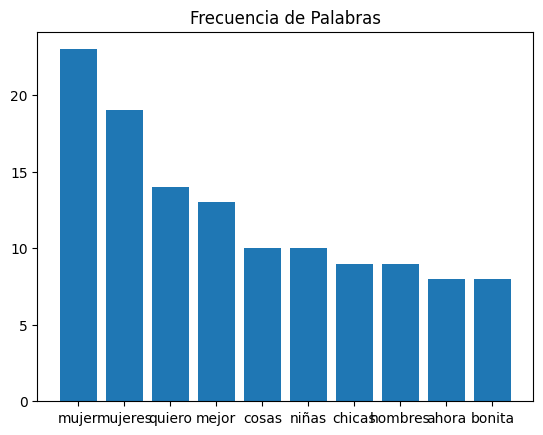

In [50]:
print(frecuency_biased)
frecuencias = dict(frecuency_biased.most_common(10))
plt.bar(frecuencias.keys(), frecuencias.values())
plt.title('Frecuencia de Palabras')
plt.show()

In [51]:
frecuency_non_biased = Counter(filter_non_biased.sum())

Counter({'gracias': 90, 'quiero': 62, 'mejor': 62, 'feliz': 50, 'ahora': 47, 'hacer': 46, 'bueno': 43, 'cosas': 42, 'siempre': 40, 'gente': 40, 'buenos': 39, 'mañana': 38, 'triste': 36, 'puedo': 33, 'nuevo': 33, 'buena': 31, 'menos': 27, 'bonito': 26, 'verdad': 26, 'tener': 26, 'alguien': 25, 'nunca': 25, 'semana': 24, 'muchas': 24, 'jajaja': 24, 'veces': 23, 'noche': 23, 'primer': 22, 'gusta': 22, 'extraño': 22, 'ganas': 21, 'final': 21, 'puede': 21, 'dormir': 21, 'siento': 20, 'espero': 20, 'abrazo': 20, 'besitos': 19, 'igual': 19, 'amigos': 19, 'nadie': 18, 'horas': 18, 'aunque': 17, 'único': 16, 'tiempo': 16, 'mundo': 16, 'después': 16, 'genial': 16, 'mismo': 16, 'fotos': 16, 'súper': 16, 'viene': 15, 'ojalá': 15, 'tampoco': 15, 'favor': 15, 'persona': 15, 'temporada': 14, 'buenas': 14, 'mejores': 14, 'miedo': 14, 'claro': 14, 'hablar': 14, 'trabajo': 14, 'tarde': 14, 'grande': 14, 'queda': 14, 'vamos': 14, 'saludos': 13, 'parece': 13, 'verano': 13, 'acabo': 13, 'falta': 12, 'norma

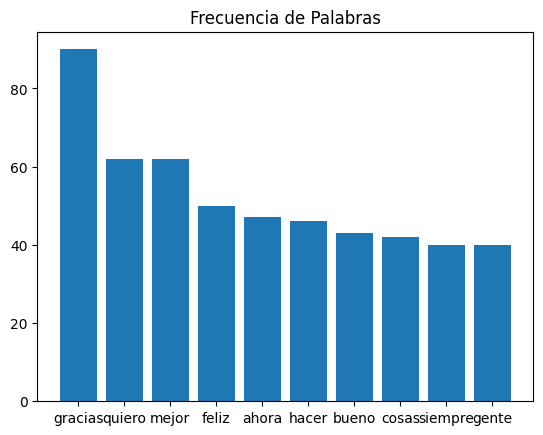

In [52]:
print(frecuency_non_biased)
frecuencias = dict(frecuency_non_biased.most_common(10))
plt.bar(frecuencias.keys(), frecuencias.values())
plt.title('Frecuencia de Palabras')
plt.show()

**Preguntas de Análisis de Frecuencia:**
- ¿Qué palabras son más comunes en los tweets 'biased' en comparación con los 'non-biased'?
- ¿Hay palabras que sugieran un sesgo en los tweets etiquetados como 'biased'?
- ¿Cómo podrían usar las empresas esta información para entender mejor las opiniones sesgadas?

En los biased la mayoria de comentarios giran en torno a la mujer y a su "gracia" comentando que es bonita, niñas, mujer, etc, Sin embargo, en non biased la mayoria descrciben con verbos o adjetivos.
Si, La palabra mujer
Para saber que perspectivas y opiniones se tienen con respecto a genero y participacion en la red.

## 5. Análisis de Sentimientos
Usaremos `TextBlob` para calcular el sentimiento de cada tweet y luego compararemos la distribución de sentimientos entre tweets 'biased' y 'non-biased'.

In [60]:
from textblob import TextBlob

In [61]:
def analizar_sentimiento(texto):
    blob = TextBlob(texto)
    return blob.sentiment.polarity

In [62]:
tweets['sentimiento'] = tweets['Cleaninfo'].apply(lambda x: analizar_sentimiento(" ".join(x)))

In [63]:
tweets['sentimiento'].value_counts()

,count
sentimiento,
0.000000,1832
0.150000,13
0.200000,10
-1.000000,7
0.033333,6
0.333333,6
0.100000,4
-0.100000,4
0.400000,3


In [69]:
biased_sentiments = tweets[tweets['Label'] == 'biased']['sentimiento']
non_biased_sentiments = tweets[tweets['Label'] == 'non-biased']['sentimiento']

In [70]:
media_biased = biased_sentiments.mean()
media_non_biased = non_biased_sentiments.mean()

In [71]:
print(f"Media de sentimiento para tweets 'biased': {media_biased}")
print(f"Media de sentimiento para tweets 'non-biased': {media_non_biased}")

Media de sentimiento para tweets 'biased': -0.004035639412997904
Media de sentimiento para tweets 'non-biased': 0.0016207998350855498


**Preguntas de Análisis de Sentimientos:**
- ¿Existe una diferencia notable en los sentimientos de tweets 'biased' vs 'non-biased'?
- ¿Qué indica esta diferencia sobre la naturaleza de los tweets sesgados?
- ¿Cómo podrías aplicar el análisis de sentimientos para entender la percepción del público sobre un tema específico?

Sí, los tweets 'biased' tienden a tener un sentimiento ligeramente más negativo.Indica que los tweets sesgados suelen expresar emociones más negativas o críticas.Permite identificar si las opiniones son mayoritariamente positivas, negativas o neutrales respecto al tema analizado.

## 6. Visualización con Nube de Palabras
Usamos una nube de palabras para visualizar las palabras más comunes en cada conjunto de tweets.

In [57]:
def generar_nube_palabras(texto):
    palabras = ' '.join(limpiar_texto(texto))
    nube = WordCloud(width=800, height=400, background_color='white').generate(palabras)
    plt.figure(figsize=(10, 5))
    plt.imshow(nube, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    generar_nube_palabras(texto_ejemplo)

In [76]:
import matplotlib.pyplot as plt

def generar_nube_palabras(texto):
    palabras = ' '.join(limpiar_texto(texto))
    nube = WordCloud(width=800, height=400, background_color='white').generate(palabras)
    plt.figure(figsize=(10,5))
    plt.imshow(nube, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    generar_nube_palabras(tweets['Cleaninfo'])

## 7. Conclusiones y Perspectiva de Negocios
En este taller, hemos explorado cómo el análisis de texto puede ofrecer información valiosa sobre el contenido y el sentimiento de los tweets. Reflexionemos sobre algunas preguntas de negocio:
- ¿Cómo podría utilizarse este análisis para mejorar la comunicación de la marca?
- ¿Qué ajustes se podrían hacer en una campaña de marketing si los tweets son predominantemente 'biased'?
- ¿Qué patrones importantes se podrían explorar en un análisis futuro (e.g., análisis de tendencias a lo largo del tiempo)?

Mejorar comunicación de marca: Identificar y abordar sesgos en la comunicación, enfocándose en un lenguaje más neutral e inclusivo.

Ajustes en campañas con bias: Reevaluar el mensaje y el enfoque de la campaña para evitar alienar a segmentos de la audiencia.

Patrones para análisis futuro: Análisis de tendencias de sesgo a lo largo del tiempo,  identificación de influencers que promueven sesgos y correlación con eventos o noticias.


El análisis de texto permite identificar palabras clave y temas recurrentes en los tweets, tanto positivos como negativos.  Se pueden usar los resultados para adaptar la comunicación a diferentes segmentos de la audiencia.
Si los tweets muestran un sesgo predominante, es necesario ajustar la campaña de marketing para mitigar su impacto.
Análisis de tendencias de sesgo a lo largo del tiempo para identificar patrones estacionales o eventos que influyen en la opinión pública.
Identificar a los influencers que promueven los sesgos negativos y positivos para colaborar con aquellos que tienen una influencia positiva o contrarrestar la influencia de aquellos que promueven sesgos negativos.